0 10 20 30 40 0 10 20 30 40 50 60 70 80 90 

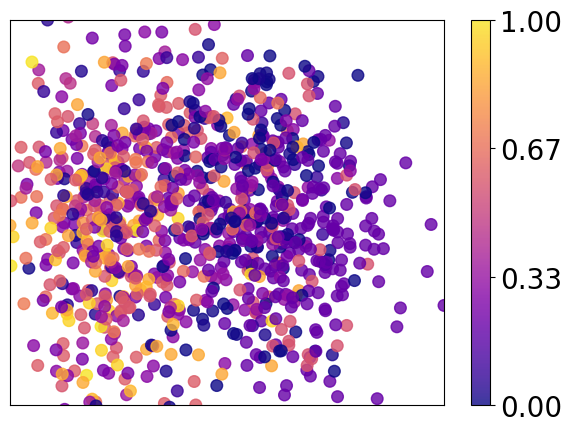

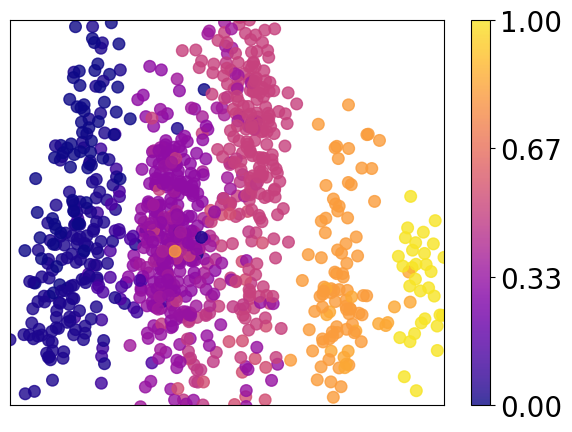

In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.decomposition import PCA

path = "./analysis_data/"
task = "pdop" 

def get_PCA(x, n_components = 2):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(x)

def plot_scatter(z, topy, ax):
    x_flat = z[:,0]
    y_flat = z[:,1]
    z_flat = (topy - topy.mean())/topy.std()
    z_flat = torch.sigmoid(torch.from_numpy(z_flat))
    
    cmap2 = plt.cm.plasma
    start = 0.95
    end = 0.0 
    cmap2 = mcolors.LinearSegmentedColormap.from_list('partial_map', cmap2(np.linspace(end, start, 256)))
    
    cas = ax.scatter(x_flat, y_flat, label='Data', s = 70, c = z_flat, cmap=cmap2, alpha=0.8)
    ax.set_xlim(np.percentile(x_flat, 0), np.percentile(x_flat, 100))
    ax.set_ylim(np.percentile(y_flat, 1), np.percentile(y_flat, 99))
    
    cbar = plt.colorbar(cas, ax=ax)
    num_ticks = 4
    cbar.set_ticks(np.linspace(cbar.vmin, cbar.vmax, num_ticks))
    cbar.set_ticklabels(["%.2f"%(x) for x in np.linspace(0,1, 4)], fontsize = 20)
    ax.set_xticks([])
    ax.set_yticks([])

fig1, (ax1) = plt.subplots(1, 1, figsize=(7, 5))
fig2, (ax2) = plt.subplots(1, 1, figsize=(7, 5))
axs = [ax1, ax2]
for i, (lam_lip, ax) in enumerate(zip(["0", "100"], axs)):
    for epoch in range(0, 100, 10):
        try:
            topy = np.load(f"{path}./top_y_all_{task}_{lam_lip}_{epoch}.npy")
            topz = np.load(f"{path}./top_z_all_{task}_{lam_lip}_{epoch}.npy")
            print(epoch, end = ' ')
        except:
            pass
        
    z = get_PCA(topz, n_components=2)
    if i == 0 :
        z1, y1 = z, topy
    if i == 1 :
        z2, y2 = z, topy
        
    plot_scatter(z, topy, ax)
    
plt.show()

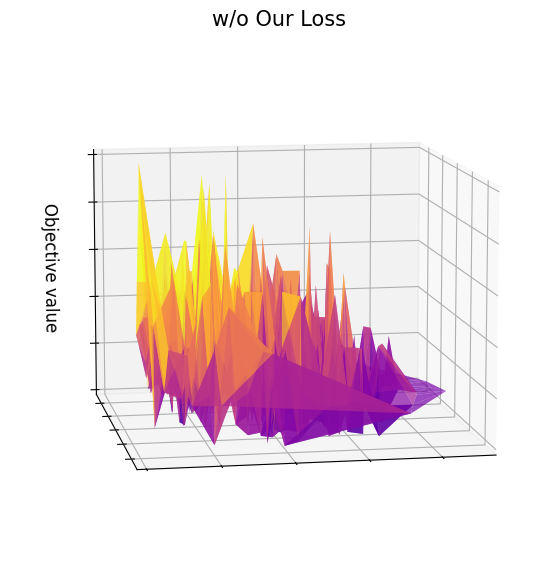

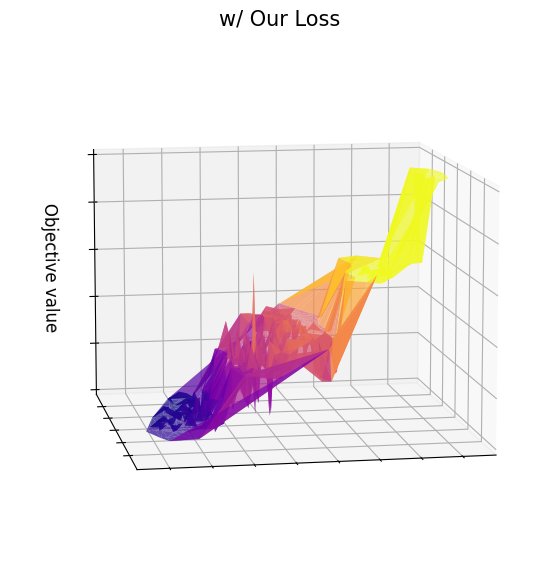

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata
from matplotlib.colors import Normalize

def minmax_norm(data):
    assert len(data.shape) <= 2
    minmax_norm = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))
    return minmax_norm

for data, y, title in ((z1, y1, "w/o Our Loss"), (z2, y2, "w/ Our Loss")):
    y = minmax_norm(y)
    grid_x, grid_y = np.mgrid[data.min(0)[0]:data.max(0)[0]:200j, data.min(0)[1]:data.max(0)[1]:200j]
    grid_z = griddata(data, y, (grid_x, grid_y), method='nearest')

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    color_low, color_high = np.percentile(y, [5, 95])
    norm = Normalize(vmin=color_low, vmax=color_high)
    surf = ax.plot_trisurf(data[:,0], data[:,1], y, cmap='plasma', edgecolor='none', norm=norm, alpha=0.7)

    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.set_zticklabels([])
    ax.grid(True)
    ax.set_xlabel('', fontsize=12)
    ax.set_ylabel('', fontsize=12)
    ax.set_zlabel('Objective value', fontsize=12)
    ax.set_title(f'{title}', fontsize=15)
    ax.view_init(elev=10, azim=-100)
    plt.show()
